## Grupo 4

*   Alex Riquelme
*   Camila Aguilar
*   Camila Varas
*   Claudia Araya
*   Fabian Cuevas







**Contexto**
Del sitio web Kaggle hemos obtenido la data house.csv, la cual posee el precio de las casas con diferentes características, por lo que en esta parte se espera que usted pueda aplicar las diferentes técnicas aprendidas en este módulo.
Usted encontrará dos archivos, uno con la base y otro archivo data.txt con la descripción de las variables de la data. Para este ejercicio debe tener las siguientes consideraciones:
Debe cargar la base y eliminar las siguientes variables, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, LotFrontage. Luego realice un resumen estadístico con las variables que han quedado en la base.

In [ ]:
#Librerías
#Importación de la libería pandas(para dataframe), matplotlib(para gráfica), seaborn (para gráfica), scipy (estadística), numpy (para cálculo matemático)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

#Se utiliza Path para cargar archivo necesario con base de datos
house_path = "house.csv"

#Se asigna el dataframe df_house para obtener los datos del archivo csv
#Luego se utiliza head para realizar una previsualización de las columnas (81 en total) y de 5 primeras filas
df_house = pd.read_csv(house_path)
df_house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Debe cargar la base y eliminar las siguientes variables, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, LotFrontage. Luego realice un resumen estadístico con las variables que han quedado en la base.

Descripción de variables eliminadas


*   Alley: Type of alley access to property (tipo de acceso a la propiedad gravilla, pavimento, NA)
*   FireplaceQU: Calidad chimenea
*   PoolQC: Calidad piscina
*   Fence: Calidad de la reja o cerca
*   MiscFeature: Características misceláneas no cubiertas en otras categorías
*   LotFrontage: Largo frontis propiedad








In [ ]:
#Se define la serie columns_eliminar con las columnas que se deben eliminar
columns_eliminar = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage']
#Se utiliza la función drop para modificar las columnas del dataframe
#inplace=true indica que la modificación se realiza en el dataframe original
#Recomendamos como buena práctica la creación de un nuevo dataframe para no modificar el original,
#pero en esta oportunidad no lo haremos para no alterar el trabajo original
df_house.drop(columns=columns_eliminar, inplace=True)
#Se utiliza print para mostrar el mensaje de columnas eliminadas
print("Columnas eliminadas")
#Usamos la función info, para desplegar información tipo resumen del dataframe, con los cambios realizados
df_house.info()

Columnas eliminadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   i

In [ ]:
#Se realiza limpieza de datos y revisión de valores NaN
#Se contabilizan los NaN. Se crea una variable nan_counts para asignar la suma de los datos NaN
nan_counts = df_house.isna().sum()
#Se filtran sólo las columnas que tienen valores NaN
nan_columns = nan_counts[nan_counts > 0]

#Se imprimen las columnas en consola
nan_columns

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [ ]:
# Limpieza de datos para las variables numéricas y categóricas
# Para las variables numéricas, asignamos la mediana
num_columns_with_nan = ['MasVnrArea', 'GarageYrBlt']
for column in num_columns_with_nan:
    df_house[column].fillna(df_house[column].median(), inplace=True)

# Para las variables categóricas, asignamos el valor "Desconocido"
cat_columns_with_nan = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
                        'GarageFinish', 'GarageQual', 'GarageCond']
for column in cat_columns_with_nan:
    df_house[column].fillna('Desconocido', inplace=True)

# Revisamos los valores NaN
nan_counts = df_house.isna().sum()
nan_columns = nan_counts[nan_counts > 0]
nan_columns

Series([], dtype: int64)

In [ ]:
df_house.head(50)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [ ]:
# resumen estadístico de las variables numéricas: contabilizar datos, promedio, desviación estándar, el mínimo y el primer cuartil
summary_statistics = df_house.describe()

summary_statistics.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000


Selección de variables determinantes para recomendación de oferta para el adulto joven recién egresado de la universidad que está en búsqueda de casa

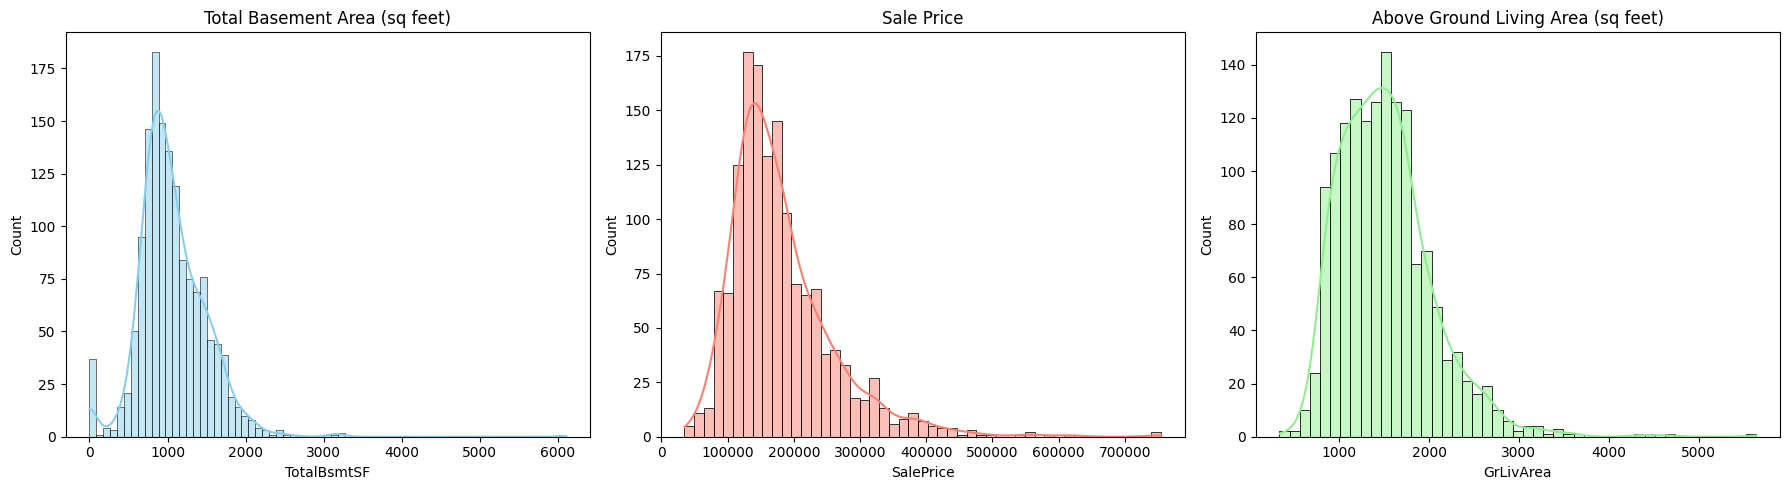

In [ ]:
# Configuración de los gráficos para TotalBsmtSF, SalePrice y GrLivArea en una sola salida
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TotalBsmtSF
sns.histplot(df_house['TotalBsmtSF'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Total Basement Area (sq feet)')

# SalePrice
sns.histplot(df_house['SalePrice'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Sale Price')

# GrLivArea
sns.histplot(df_house['GrLivArea'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Above Ground Living Area (sq feet)')

plt.tight_layout()
plt.show()

Se utilizan estas variables, que de acuerdo a la gráfica anterior, se puede apreciar que tienen una distribución normal. Esto significa que los valores son cercanos a la media y son más comunes los valores que están lejos de la media. Por lo tanto se infiere que estas tres variables son útiles a la hora de evaluar una oferta de compra de un bien inmueble.

Los diagramas de caja (boxplot) son representaciones gráficas que permiten visualizar la distribución de los datos, identificar su grado de dispersión/simetría y detectar valores atípicos (outliers). Son muy útiles para comparar distribuciones entre diferentes grupos o variables, lo que facilita la comprensión de la distribución de los datos a través de cuartiles.

Componentes de un Boxplot:

Caja: Representa el rango intercuartílico (IQR), que es la distancia entre el primer cuartil (Q1, el 25% de los datos) y el tercer cuartil (Q3, el 75% de los datos). La caja contiene la mitad central de los datos.

Línea dentro de la caja: Indica la mediana (Q2) de la distribución, que es el valor que divide a los datos en dos mitades iguales.

Bigotes (Whiskers): Se extienden desde la caja hasta los valores máximos y mínimos dentro de un límite determinado, generalmente 1.5 veces el IQR por encima de Q3 y por debajo de Q1. Los bigotes muestran la variabilidad fuera de los cuartiles superior e inferior.

Puntos fuera de los bigotes: Representan los valores atípicos, es decir, aquellos puntos de datos que caen fuera del rango definido por los bigotes. Estos valores pueden indicar variabilidad excepcional, errores de medición o particularidades de la distribución.

Interpretación de un Boxplot:
Posición de la mediana: Si la línea de la mediana está cerca del centro de la caja, sugiere una distribución simétrica. Si está más cerca de uno de los bordes, indica asimetría en los datos.

Longitud de la caja: Un IQR más largo señala mayor dispersión en los datos medios, mientras que un IQR corto indica menos variabilidad.
Simetría de la caja y los bigotes: Si los bigotes y la caja son simétricos alrededor de la mediana, los datos son más uniformes. La asimetría puede sugerir sesgo en la distribución.

Presencia de valores atípicos: Los valores atípicos pueden sugerir variaciones especiales en los datos, errores de medición o simplemente variabilidad natural. Es importante analizar estos valores para entender su impacto en el análisis general.

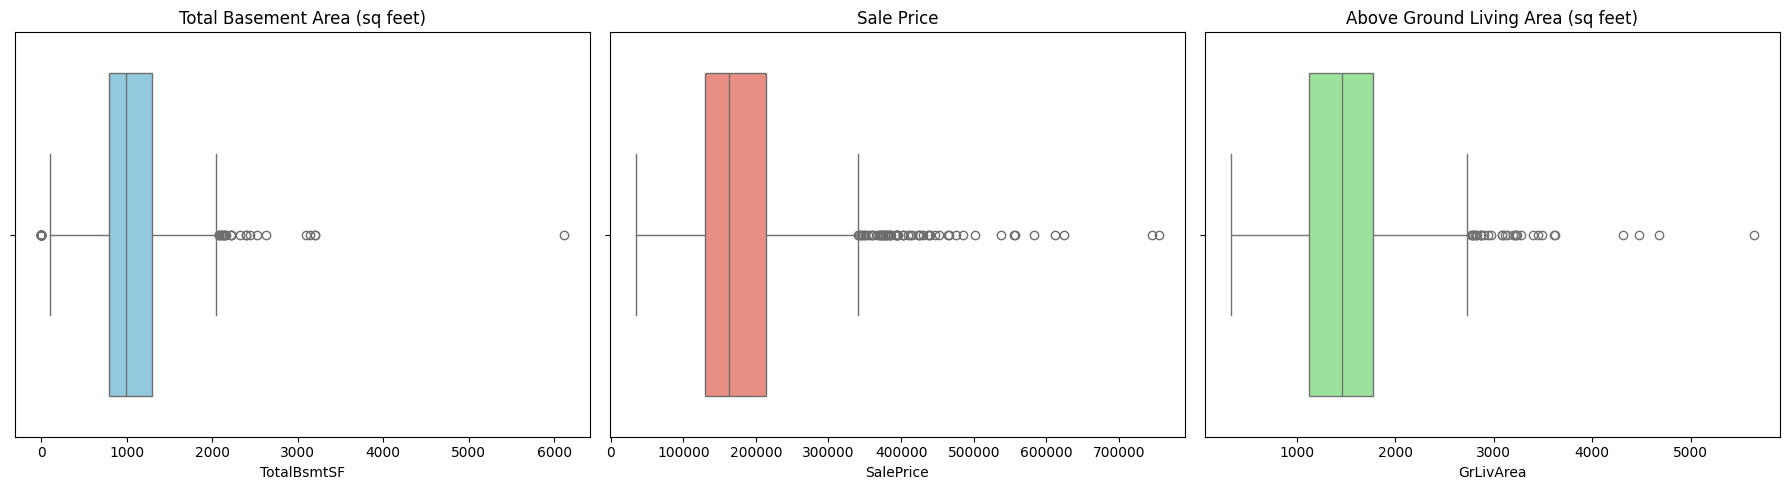

In [ ]:
# Crear diagramas de boxplot para TotalBsmtSF, SalePrice y GrLivArea para identificar outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TotalBsmtSF
sns.boxplot(x=df_house['TotalBsmtSF'], ax=axes[0], color='skyblue')
axes[0].set_title('Total Basement Area (sq feet)')

# SalePrice
sns.boxplot(x=df_house['SalePrice'], ax=axes[1], color='salmon')
axes[1].set_title('Sale Price')

# GrLivArea
sns.boxplot(x=df_house['GrLivArea'], ax=axes[2], color='lightgreen')
axes [2].set_title('Above Ground Living Area (sq feet)')

plt.tight_layout()
plt.show()

Los diagramas de cajas y bigotes para TotalBsmtSF, SalePrice y GrLivArea revelan la presencia de outliers en las tres variables:

- **TotalBsmtSF (Área Total del Sótano):** Se observan varios puntos que se desvían significativamente hacia la derecha de la caja, lo que indica la presencia de propiedades con áreas de sótano excepcionalmente grandes.
- **SalePrice (Precio de Venta):** Similarmente, hay una cantidad notable de puntos por encima del bigote superior, indicando precios de venta significativamente más altos que la mayoría de las propiedades.
- **GrLivArea (Área Habitacional sobre el Nivel del Suelo):** Esta variable también muestra outliers, con puntos que se extienden hacia la derecha, indicando propiedades con áreas habitacionales muy grandes.

La presencia de estos outliers puede afectar el análisis, ya que pueden distorsionar las estimaciones estadísticas y las interpretaciones. La eliminación de estos outliers permitirá una evaluación más precisa de las tendencias generales y características del mercado inmobiliario.

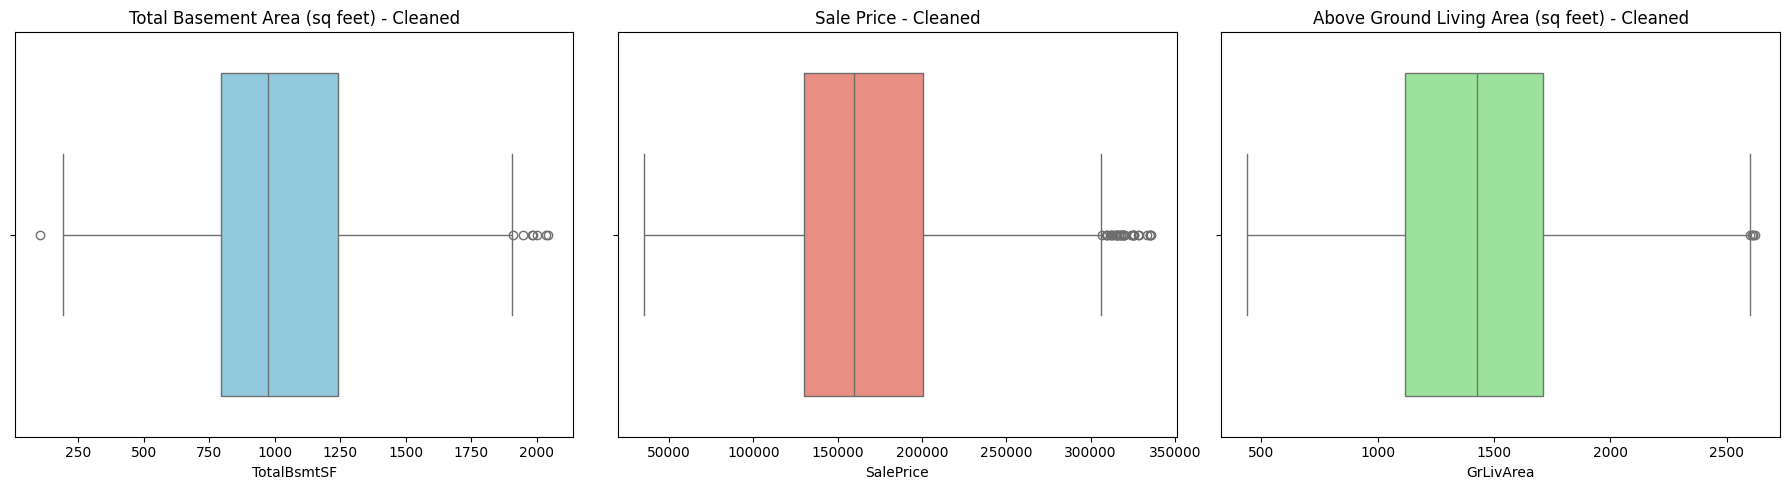

In [ ]:
# Limpieza de outliers

# Función para eliminar outliers basados en IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Eliminar outliers de las tres variables
df_cleaned = remove_outliers(df_house, 'TotalBsmtSF')

# Estos dos códigos ya incorporan df_house, por eso los elimina desde df_cleaned
df_cleaned = remove_outliers(df_cleaned, 'SalePrice')
df_cleaned = remove_outliers(df_cleaned, 'GrLivArea')

# Crear nuevamente diagramas de boxplot para las variables después de eliminar outliers
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TotalBsmtSF
sns.boxplot(x=df_cleaned['TotalBsmtSF'], ax=axes[0], color='skyblue')
axes[0].set_title('Total Basement Area (sq feet) - Cleaned')

# SalePrice
sns.boxplot(x=df_cleaned['SalePrice'], ax=axes[1], color='salmon')
axes[1].set_title('Sale Price - Cleaned')

# GrLivArea
sns.boxplot(x=df_cleaned['GrLivArea'], ax=axes[2], color='lightgreen')
axes[2].set_title('Above Ground Living Area (sq feet) - Cleaned')

plt.tight_layout()
plt.show()

Después de eliminar los valores atípicos (outliers), los diagramas de caja para TotalBsmtSF, SalePrice y GrLivArea muestran una distribución más uniforme y representativa de las propiedades típicas en el mercado:

TotalBsmtSF (Área Total del Sótano - Limpio): La distribución ahora parece más centrada, con menos puntos extremos, lo que indica una representación más precisa del área del sótano en las propiedades comunes.

SalePrice (Precio de Venta - Limpio): La eliminación de outliers ha reducido significativamente la cantidad de puntos extremadamente altos, ofreciendo una visión más realista de los precios de venta en el mercado. Sin embargo, aún existe una cantidad considerable de outliers, concentrados en el límite superior del bigote.

GrLivArea (Área Habitacional sobre el Nivel del Suelo - Limpio): Similarmente, la limpieza ha resultado en una distribución más concentrada, eliminando las propiedades con áreas habitacionales excepcionalmente grandes.

Esta limpieza de outliers permite una evaluación más precisa y realista de las tendencias del mercado inmobiliario, especialmente relevante para el perfil demográfico en cuestión: adultos jóvenes recién egresados buscando su primera casa. Con distribuciones más representativas, podemos proceder a análisis más detallados, como la construcción de intervalos de confianza y pruebas de hipótesis, con mayor confianza al generalizar los resultados.



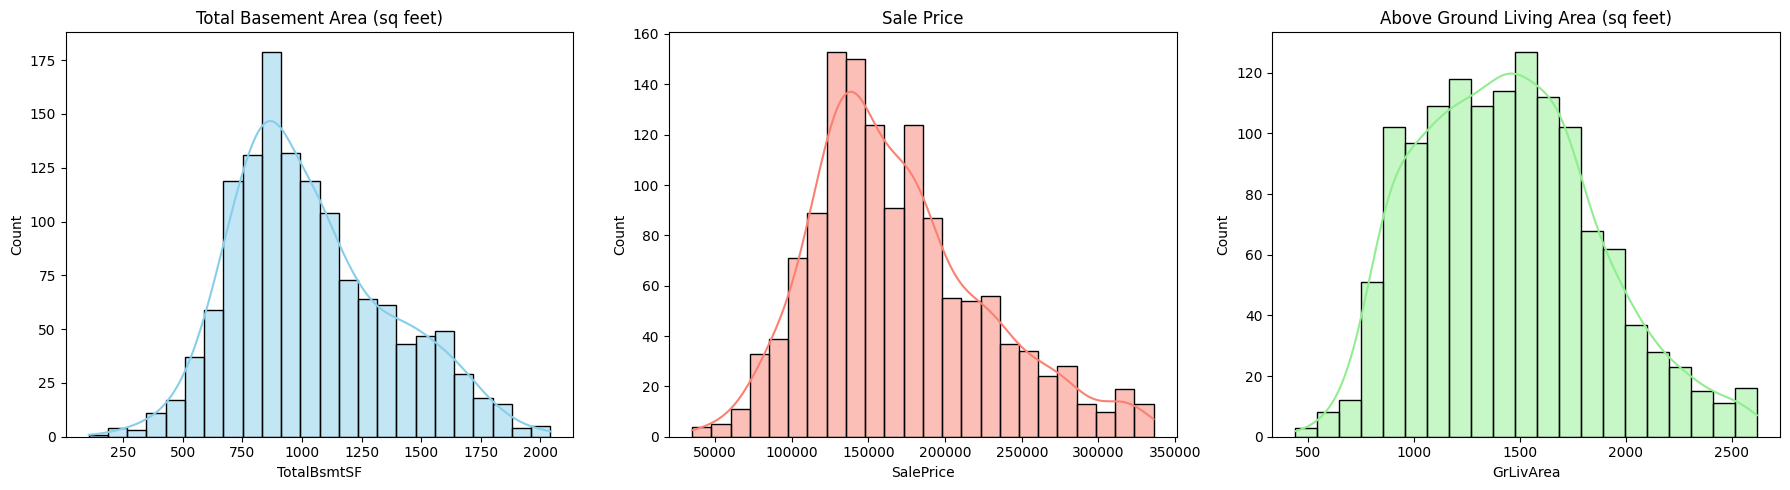

In [ ]:
# Gráfico de distribucion de las variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# TotalBsmtSF
sns.histplot(df_cleaned['TotalBsmtSF'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Total Basement Area (sq feet)')

# SalePrice
sns.histplot(df_cleaned['SalePrice'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Sale Price')

# GrLivArea
sns.histplot(df_cleaned['GrLivArea'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Above Ground Living Area (sq feet)')



plt.tight_layout()
plt.show()

Después de la eliminación de outliers, las distribuciones de TotalBsmtSF (Área Total del Sótano), SalePrice (Precio de Venta) y GrLivArea (Área Habitacional sobre el Nivel del Suelo) presentan una apariencia más normalizada, lo cual es esencial para nuestro análisis bajo el supuesto de normalidad

### Análisis equipo sprint 4

**El precio de venta promedio de las casas con un área habitable (GrLivArea) y un área total de sótano (TotalBsmtSF) dentro del rango medio ¿es accesible para un adulto joven recién egresado?**

Para responder a esta pregunta, procederemos de la siguiente manera:

- **Intervalos de Confianza:**
Un intervalo de confianza, es una técnica de estimación utilizada en inferencia estadística que permite acotar un par o varios pares de valores, dentro de los cuales se encontrará la estimación la estimación puntual buscada (con una determinada probabilidad). Sin embargo, no sirve para dar una estimación puntual de los parámetros, pero sí sirve para hacerse una idea aproximada de cuál podría ser el verdadero de éste. Nos permite acotar entre dos valores en dónde se encontrará la media de a población.

  Se generaran intervalos de confianza para el precio de venta promedio de las casas, lo que nos permitirá estimar el rango en el que se espera que se encuentre el verdadero precio de venta promedio de estas casas con un cierto nivel de confianza.
- **Test de Hipótesis:** Realizaremos pruebas de hipótesis para evaluar si el precio de venta promedio de las casas con áreas específicas (GrLivArea y TotalBsmtSF) es significativamente diferente de un valor que consideremos como umbral de accesibilidad para el adulto joven recién egresado.
- **Umbral de accesibilidad** En nuestro análisis, hemos definido hipotéticamente el umbral de accesibilidad como $150,000 para examinar la accesibilidad de la vivienda para el adulto joven recién egresado. Este valor se utiliza como un punto de referencia para evaluar si el precio de venta promedio de las casas en el mercado es accesible para nuestro perfil demográfico objetivo. Sin embargo, es importante destacar que este umbral es un ejemplo y debe ser ajustado para reflejar la realidad económica y las capacidades financieras de los compradores en el contexto específico en el que se realiza el análisis.


**Formulación de Intervalos de Confianza y Pruebas de Hipótesis**

- **Intervalo de Confianza para el Precio de Venta Promedio:** Calcularemos un intervalo de confianza del 95% para el precio de venta promedio.
- **Prueba de Hipótesis:** La hipótesis nula (H0) será que el precio de venta promedio es igual al umbral de accesibilidad (por definir), mientras que la hipótesis alternativa (H1) será que el precio de venta promedio es diferente de este umbral.

In [17]:
from scipy import stats
import numpy as np

# Definir el nivel de confianza
confidence_level = 0.95

# Calcular el intervalo de confianza para el precio de venta promedio
sale_price_mean = df_cleaned['SalePrice'].mean()
sale_price_std = df_cleaned['SalePrice'].std()
n = len(df_cleaned['SalePrice'])
z_critical = stats.norm.ppf((1 + confidence_level) / 2) # Z-score para el nivel de confianza del 95%

# Margen de error
margin_of_error = z_critical * (sale_price_std / np.sqrt(n))

# Intervalo de confianza
confidence_interval = (sale_price_mean - margin_of_error, sale_price_mean + margin_of_error)

# Umbral de accesibilidad en terminos monetarios (hipotético)
accessibility_threshold = 150000

# Realizar la prueba de hipótesis
# H0: mu = accessibility_threshold
# H1: mu != accessibility_threshold
t_stat, p_value = stats.ttest_1samp(df_cleaned['SalePrice'], accessibility_threshold)

# Resultados
print(f"Intervalo de confianza: {confidence_interval}")
print(f"Valor t {t_stat}")
print(f"Valor p {p_value}")

Intervalo de confianza: (166168.6765449053, 172273.17390826694)
Valor t 12.34248094519635
Valor p 3.323817673409953e-33


El resultado de la prueba de hipótesis indica que el precio de venta promedio de las casas es estadísticamente significativo y difiere del umbral de accesibilidad   de USD 150,000 que habíamos considerado inicialmente. Con un valor p muy por debajo del nivel de significancia estándar de 0.05, rechazamos la hipótesis nula de que el precio de venta promedio es igual a USD 150,000. Esto sugiere que, en promedio, las casas en este mercado son más caras que nuestro umbral definido para la accesibilidad.

Basándonos en estas conclusiones, podemos señalar que para un adulto joven recién egresado buscando comprar su primera casa, el mercado actual puede presentar desafíos en términos de precios. Las casas, en promedio, están por encima del umbral de accesibilidad preestablecido, lo que sugiere la necesidad de una planificación financiera cuidadosa y la exploración de opciones de vivienda que ofrezcan un buen equilibrio entre precio, ubicación y características deseables.

Para elaborar un análisis más preciso y realista, resulta esencial incorporar un espectro más amplio de variables, así como llevar a cabo un exhaustivo estudio de mercado que permita determinar un valor adecuado para el umbral de accesibilidad vigente. Un caso ilustrativo de esto se observa en Chile, donde los eventos anteriores y posteriores a la pandemia han provocado una escalada en los precios del sector inmobiliario. Este fenómeno ha complicado de manera creciente la adquisición de vivienda propia para los profesionales jóvenes, evidenciando la dinámica y volatilidad del mercado. En este contexto, comprender las fluctuaciones y tendencias actuales se vuelve fundamental para ajustar nuestras estimaciones y recomendaciones, asegurando que reflejen las condiciones del mercado en tiempo real y proporcionen una guía valiosa para la toma de decisiones informadas en el ámbito de la vivienda.
